!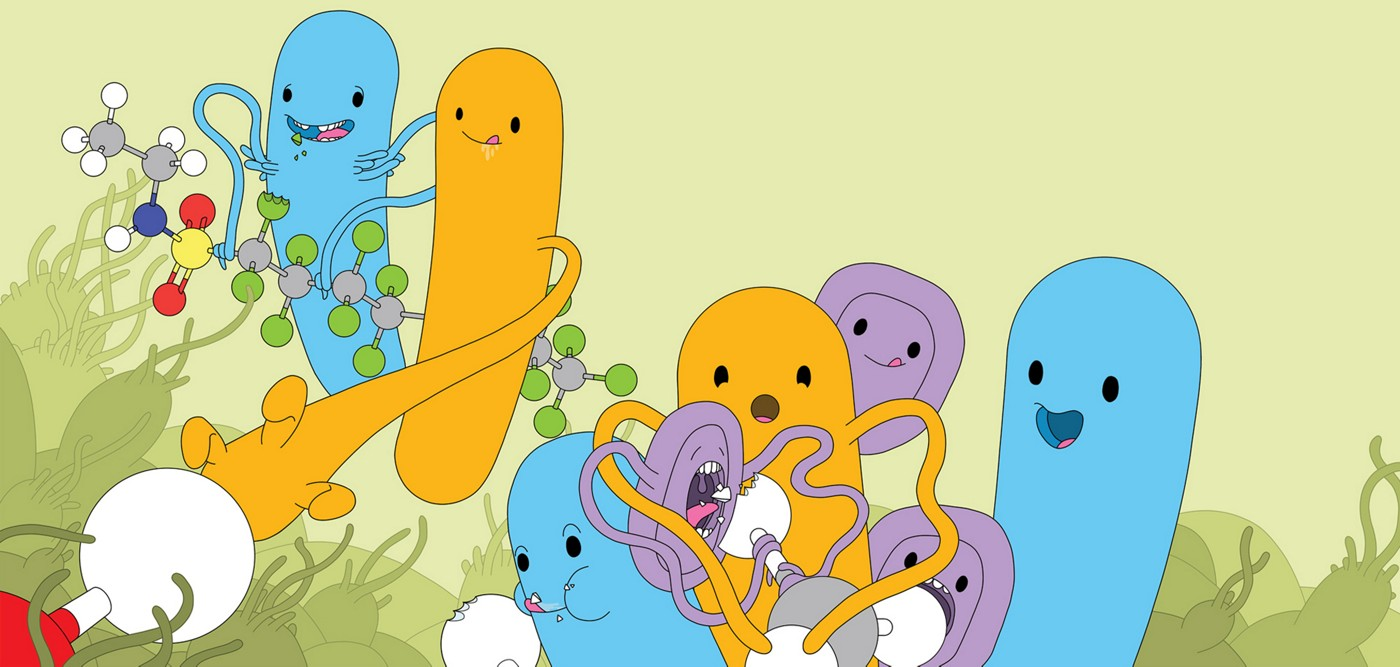

# Loading Libraries


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

# Loading Dataset


In [2]:
train = pd.read_csv("train_dataset.csv")
test  = pd.read_csv("test_dataset.csv")

In [3]:
df = train.copy(deep=True)

In [36]:
df_test = test.copy(deep=True)

## What do you need to do now?
*  Perform EDA and Data Visualization, to understand the data. Learn more about EDA [here](https://dphi.tech/learn/introduction-to-exploratory-data-analysis). Learn more about data visualization [here](https://dphi.tech/learn/introduction-to-data-visualization)
*  Clean the data if required (like removing or filling missing values, treat outliers, etc.). Learn more about handling missing values [here](https://youtu.be/EaGbS7eWSs0)
*  Perform Data Preprocessing if you feel it's required. Learn one hot encoding [here](https://youtu.be/9yl6-HEY7_s).

# **Basic EDA**

In [4]:
df.head()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,13126,10.30,22.5,2.000,6.95,0.0726,5.00,2.15,22.9,6.98,...,6.98,0.841,0.273,0.325,0.02840,7.06,5.42,0.1840,1.930,Penicillum
1,12936,7.41,20.3,1.010,20.60,0.0207,4.57,13.00,22.9,20.40,...,20.40,0.389,0.295,0.163,0.01060,20.50,9.92,0.0495,1.280,Penicillum
2,28006,12.60,19.5,3.810,9.84,0.2990,6.67,6.08,22.6,9.81,...,9.82,1.040,0.914,0.305,0.08240,10.50,4.46,0.6490,5.350,Ulothrix
3,24884,5.81,21.9,3.090,4.79,0.1940,3.34,8.67,22.5,4.54,...,5.60,1.410,0.696,0.742,0.11700,5.50,13.50,0.4310,3.970,Ulothrix
4,10680,7.51,17.3,0.751,15.40,0.0110,5.36,22.30,23.0,15.50,...,15.50,0.253,0.272,0.100,0.00609,15.40,16.80,0.0287,0.678,Raizopus


In [5]:
df.shape

(21368, 26)

In [6]:
df.describe()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,...,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000
mean,15257.325908,9.700074,19.489904,3.637855,11.829647,0.420587,5.846141,11.777357,22.379627,10.877837,...,11.005289,10.980848,1.605573,1.013201,0.829936,0.255499,11.712323,11.597781,0.804587,5.220293
std,8808.215772,4.058715,3.463016,2.212756,6.045689,0.873546,3.256171,6.571021,0.941583,6.093468,...,6.088829,6.090648,1.673051,1.242217,1.143075,0.996407,6.031121,5.711966,1.170108,2.802506
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7619.500000,6.590000,17.400000,2.170000,6.720000,0.093675,3.300000,6.080000,22.200000,5.660000,...,5.730000,5.720000,0.635000,0.420000,0.252750,0.034700,6.560000,7.110000,0.215000,3.110000
50%,15247.500000,9.360000,20.700000,3.380000,12.000000,0.230000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.170000,0.744000,0.519000,0.085900,12.000000,11.200000,0.514000,5.320000
75%,22905.250000,12.600000,22.200000,4.602500,17.100000,0.438000,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.800000,2.070000,1.220000,0.967000,0.201000,16.900000,16.200000,0.943000,7.050000
max,30525.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21368 entries, 0 to 21367
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial No        21368 non-null  int64  
 1   Solidity         21368 non-null  float64
 2   Eccentricity     21368 non-null  float64
 3   EquivDiameter    21368 non-null  float64
 4   Extrema          21368 non-null  float64
 5   FilledArea       21368 non-null  float64
 6   Extent           21368 non-null  float64
 7   Orientation      21368 non-null  float64
 8   EulerNumber      21368 non-null  float64
 9   BoundingBox1     21368 non-null  float64
 10  BoundingBox2     21368 non-null  float64
 11  BoundingBox3     21368 non-null  float64
 12  BoundingBox4     21368 non-null  float64
 13  ConvexHull1      21368 non-null  float64
 14  ConvexHull2      21368 non-null  float64
 15  ConvexHull3      21368 non-null  float64
 16  ConvexHull4      21368 non-null  float64
 17  MajorAxisLen

# Checking for Missing Values

In [8]:
df.isnull().sum()

Serial No          0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

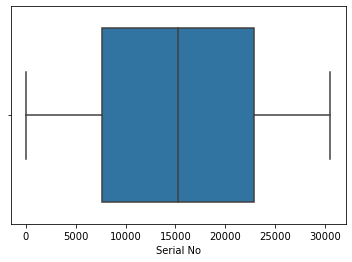

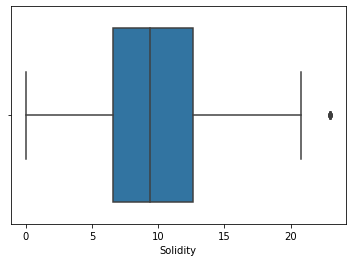

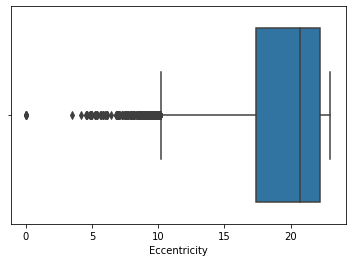

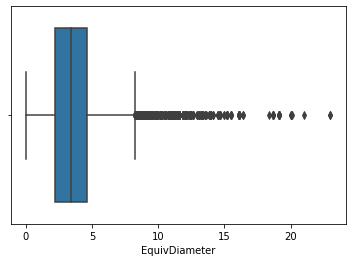

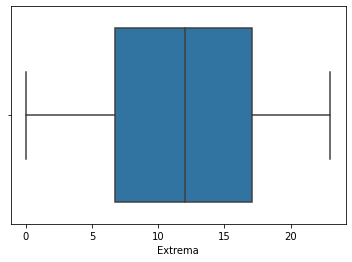

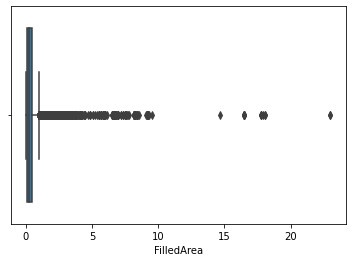

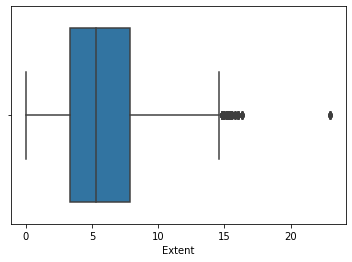

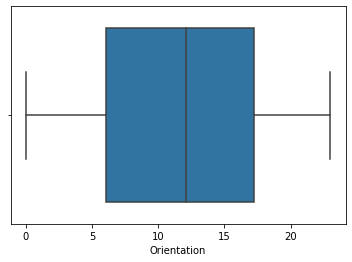

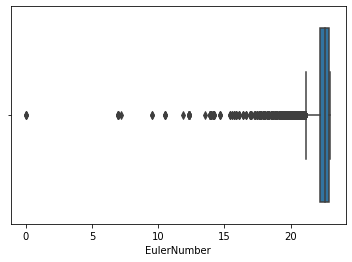

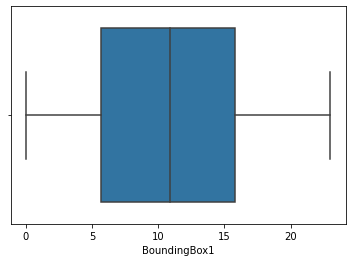

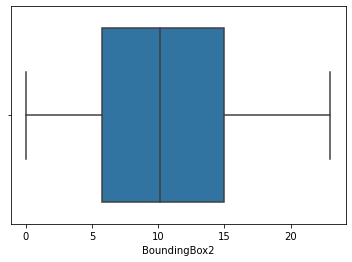

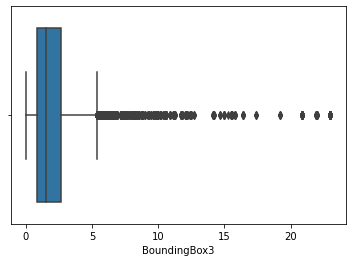

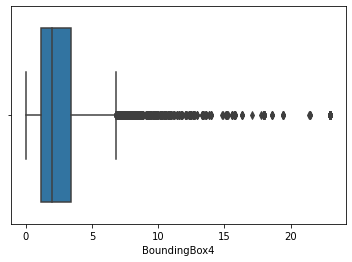

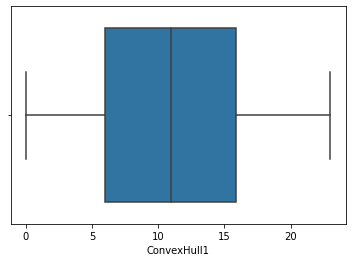

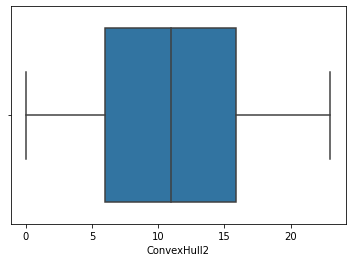

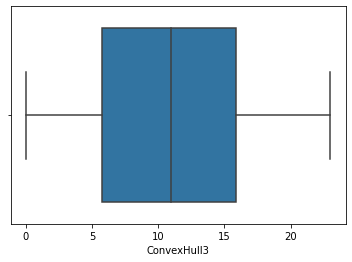

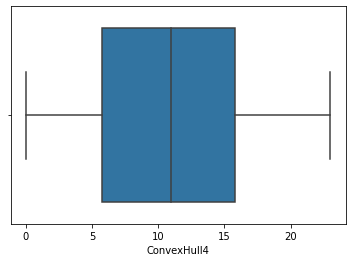

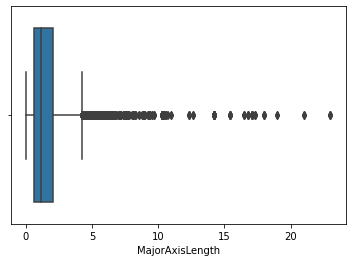

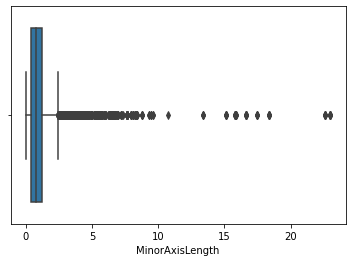

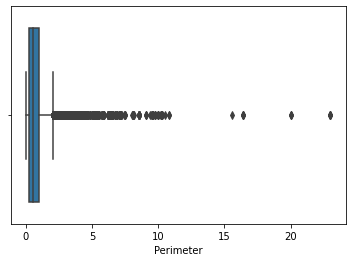

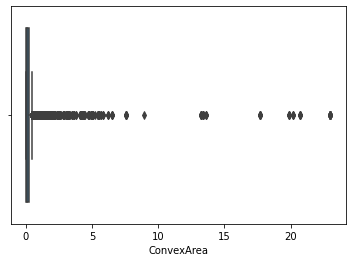

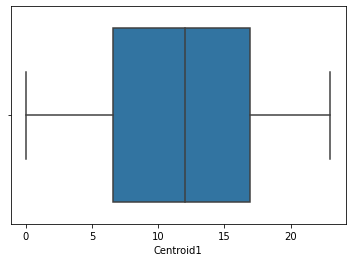

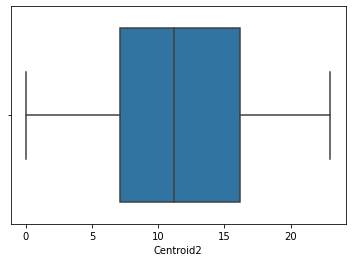

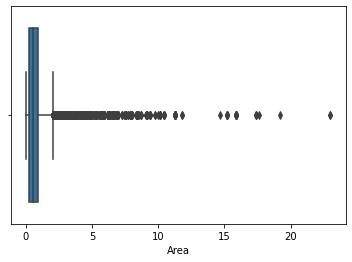

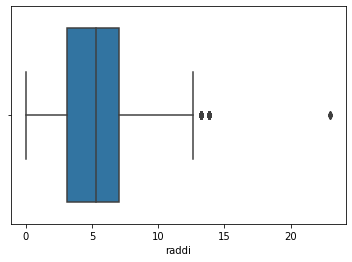

In [11]:
# Boxplots
for i in df.columns:
    if i != 'microorganisms':
        sns.boxplot(x=df[i])
        plt.show()

array([[<AxesSubplot:title={'center':'Serial No'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extrema'}>],
       [<AxesSubplot:title={'center':'FilledArea'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Orientation'}>,
        <AxesSubplot:title={'center':'EulerNumber'}>,
        <AxesSubplot:title={'center':'BoundingBox1'}>],
       [<AxesSubplot:title={'center':'BoundingBox2'}>,
        <AxesSubplot:title={'center':'BoundingBox3'}>,
        <AxesSubplot:title={'center':'BoundingBox4'}>,
        <AxesSubplot:title={'center':'ConvexHull1'}>,
        <AxesSubplot:title={'center':'ConvexHull2'}>],
       [<AxesSubplot:title={'center':'ConvexHull3'}>,
        <AxesSubplot:title={'center':'ConvexHull4'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'

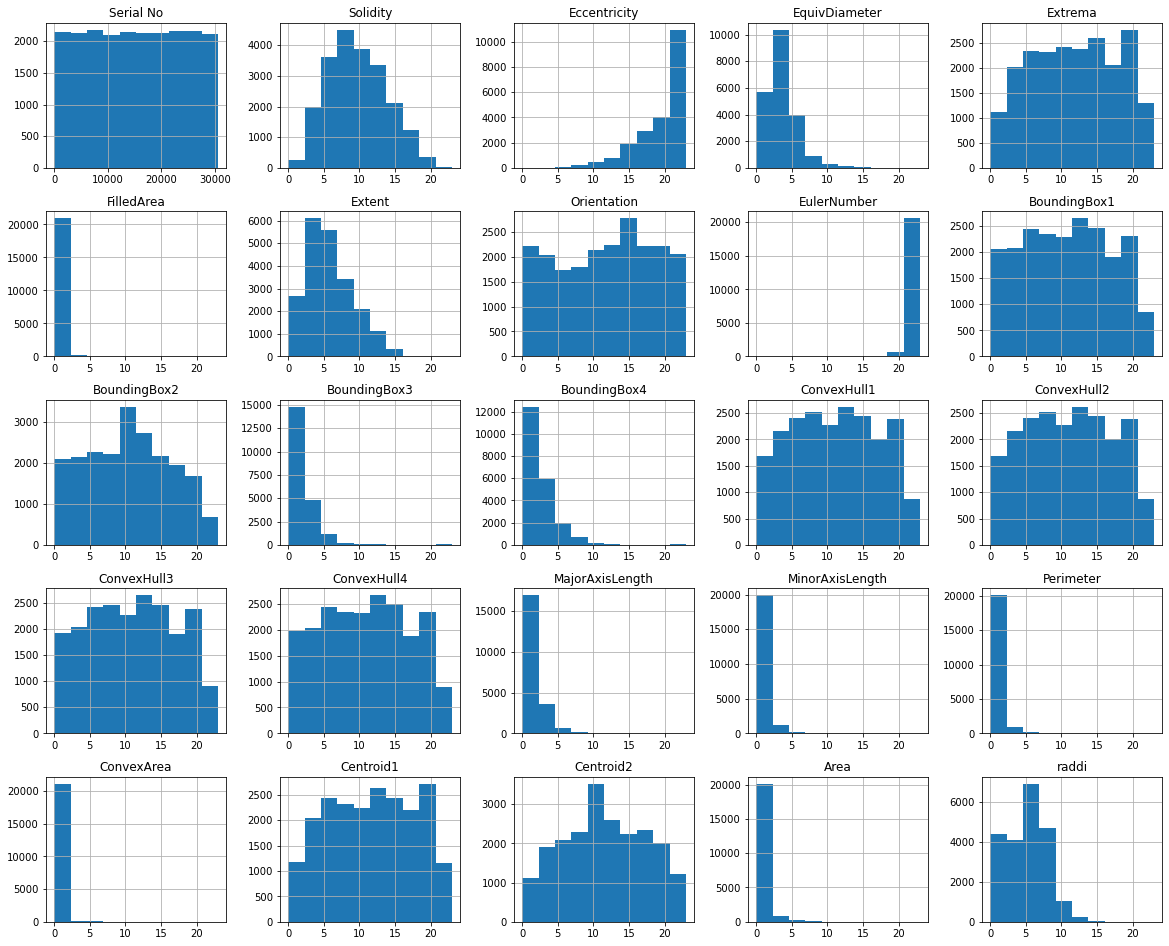

In [16]:
# Histograms
col = ['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi']
df[col].hist(bins=10,figsize=(20,20),layout=(6,5))

In [9]:
df.microorganisms.value_counts()

Ulothrix          5194
Volvox            3024
Protozoa          2721
Aspergillus sp    2721
Yeast             2520
Raizopus          1786
Diatom            1273
Pithophora         945
Penicillum         756
Spirogyra          428
Name: microorganisms, dtype: int64

# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we want to predict whether the meteor is a threat to the Earth or not, so the variable **Hazardous** is our target variable and remaining features are input variable.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [17]:
# Input/independent variables
X = df.drop('microorganisms', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df['microorganisms']             # Output/Dependent variable

# Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape

(17094, 25)

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
X_train

array([[ 0.46680377, -1.43896068, -1.06144499, ...,  0.22491907,
         0.05234071, -0.15402749],
       [ 0.02477505,  0.01348052,  0.4064287 , ...,  0.60962644,
        -0.54094186, -1.23526069],
       [-1.25859263,  1.53767777, -0.83119029, ..., -0.177275  ,
        -0.54181433, -0.30746983],
       ...,
       [-1.13632937,  0.39947853, -1.32048152, ..., -0.64242119,
        -0.32805811, -1.04970252],
       [ 0.23292854, -0.59025994,  0.32008319, ...,  0.15497227,
         0.11690381, -0.40381734],
       [-0.8728798 ,  1.16652584, -0.9175358 , ..., -0.177275  ,
        -0.34376265,  0.03153068]])

In [28]:
X_test

array([[-0.52828142,  2.59551881, -0.57761588, ..., -1.08192591,
        -0.64551919, -1.60524327],
       [-1.57320219, -1.07053834,  0.61006723, ...,  1.57136932,
         0.5518127 , -0.9252112 ],
       [-1.53434572, -1.19397461,  0.95768179, ...,  1.44925843,
        -0.26012585, -0.04131206],
       ...,
       [-0.49181088,  1.90427571, -0.75142316, ..., -0.96504834,
        -0.65089796,  0.38994518],
       [ 1.15209022,  1.63271592, -0.6934874 , ..., -0.92667063,
         0.04979391,  0.80694598],
       [ 0.48744018,  0.69460029, -0.80935892, ...,  1.04803693,
        -0.39929092, -1.00005749]])

# Building Model
Now we are finally ready, and we can train the model.

There are tons of Machine Learning models like Logistic Regression, Random Forest, Decision Tree, etc. to say you some. However here we are using RandomForest Classifier (using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

## Logistic Regression

In [30]:
# Train the Model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
print(X_train.shape,y_train.shape)

(17094, 25) (17094,)


# Validate The Model
Wonder🤔 how well your model learned! Lets check it.

# Predict on the validation data (X_val)
Now we predict using our trained model on the test set we created i.e. X_val and evaluate our model on unforeseen data.

In [33]:
pred = model.predict(X_val)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

In [35]:
# Checking the accuracy of the Validation dataset
print('Accuracy score',accuracy_score(pred,y_val))

Accuracy score 0.9370613008890969


Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. testing_set_label.csv) given in 'Data' section of the problem page.

**Note:** 
#### PREPARING TESTING DATASET FOR PREDICTIONS
*  Use the same techniques to deal with missing values as done with the training dataset.   

*  **Don't remove any observation/record from the test dataset otherwise you will get wrong answer. The number of items in your prediction should be same as the number of records are present in the test dataset**.

*  Use the same techniques to preprocess the data as done with training dataset.

***Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and validation data?***

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the rmse of the model will increase. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a ValueError saying something like 'number of features given x; expecting n'. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.



In [37]:
df_test.head()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
0,22885,6.70,20.2,5.16,5.14,0.591,3.66,5.44,22.2,4.79,...,4.79,4.95,1.990,1.570,1.500,0.2790,6.12,15.20,1.180,8.93
1,19703,3.20,20.2,4.74,21.90,0.403,1.91,17.60,22.2,18.20,...,18.20,18.20,2.380,1.890,1.390,0.4860,20.00,14.60,0.998,4.83
2,27194,13.40,17.4,4.12,3.98,0.389,10.40,0.75,22.6,3.09,...,3.12,3.09,0.939,1.010,0.337,0.0902,3.53,3.89,0.758,6.00
3,4687,8.74,17.0,4.35,17.30,0.360,5.89,20.50,21.8,16.20,...,16.70,16.50,1.370,1.530,1.050,0.1540,17.00,6.15,0.844,9.04
4,17886,7.59,18.9,3.34,20.60,0.221,4.04,4.39,22.6,20.80,...,21.50,21.60,0.967,0.907,0.514,0.1050,21.80,7.58,0.501,3.40


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial No        9159 non-null   int64  
 1   Solidity         9159 non-null   float64
 2   Eccentricity     9159 non-null   float64
 3   EquivDiameter    9159 non-null   float64
 4   Extrema          9159 non-null   float64
 5   FilledArea       9159 non-null   float64
 6   Extent           9159 non-null   float64
 7   Orientation      9159 non-null   float64
 8   EulerNumber      9159 non-null   float64
 9   BoundingBox1     9159 non-null   float64
 10  BoundingBox2     9159 non-null   float64
 11  BoundingBox3     9159 non-null   float64
 12  BoundingBox4     9159 non-null   float64
 13  ConvexHull1      9159 non-null   float64
 14  ConvexHull2      9159 non-null   float64
 15  ConvexHull3      9159 non-null   float64
 16  ConvexHull4      9159 non-null   float64
 17  MajorAxisLengt

In [44]:
df_test.isnull().sum()

Serial No          0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
dtype: int64

In [45]:
df_test = scaler.transform(df_test)

In [46]:
df_test

array([[ 0.86192147, -0.73872071,  0.20495584, ...,  0.62711314,
         0.32542519,  1.31973261],
       [ 0.50136382, -1.60474188,  0.20495584, ...,  0.52219294,
         0.16663485, -0.14332221],
       [ 1.35018135,  0.91909123, -0.6009356 , ..., -1.35063249,
        -0.04275899,  0.27418368],
       ...,
       [-0.90970608,  0.91909123,  0.83815626, ...,  0.01507868,
         0.35159942,  0.51683667],
       [-1.1463008 ,  0.0283266 , -0.85997213, ..., -0.61793981,
        -0.42752019, -0.27892242],
       [-0.31266703, -1.04553964, -0.62971743, ...,  1.27412099,
        -0.06369838,  0.59177363]])

## Make Prediction on Test Dataset
Time to make submission!!!

In [48]:
target = model.predict(df_test)

#### Note: **Follow the submission guidelines given in 'How To Submit' Section.**

## How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [49]:
#target = pd.read_csv(r'test_ans.csv')
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["microorganisms"]
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_score(y_val, rf.predict(X_val))

0.9995320542817033

In [53]:
rf_pred = rf.predict(df_test)

rf_res = pd.DataFrame(rf_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
rf_res.columns = ["microorganisms"]
rf_res.to_csv("submission_rf.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## Support Vector Machines

In [54]:
svm = SVC()
svm.fit(X_train, y_train)
accuracy_score(y_val, svm.predict(X_val))

0.9560131024801123

## CatBoost

In [41]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
accuracy_score(y_val, cat.predict(X_val))

Learning rate set to 0.091453
0:	learn: 1.7196998	total: 184ms	remaining: 3m 3s
1:	learn: 1.4052350	total: 214ms	remaining: 1m 46s
2:	learn: 1.1900552	total: 248ms	remaining: 1m 22s
3:	learn: 1.0328054	total: 278ms	remaining: 1m 9s
4:	learn: 0.9110930	total: 309ms	remaining: 1m 1s
5:	learn: 0.8110996	total: 338ms	remaining: 56s
6:	learn: 0.7274127	total: 368ms	remaining: 52.3s
7:	learn: 0.6588226	total: 399ms	remaining: 49.4s
8:	learn: 0.6004295	total: 432ms	remaining: 47.5s
9:	learn: 0.5488904	total: 461ms	remaining: 45.7s
10:	learn: 0.5000187	total: 489ms	remaining: 44s
11:	learn: 0.4596789	total: 518ms	remaining: 42.7s
12:	learn: 0.4204425	total: 546ms	remaining: 41.5s
13:	learn: 0.3849798	total: 576ms	remaining: 40.5s
14:	learn: 0.3553912	total: 605ms	remaining: 39.7s
15:	learn: 0.3262487	total: 634ms	remaining: 39s
16:	learn: 0.3022903	total: 667ms	remaining: 38.6s
17:	learn: 0.2797035	total: 698ms	remaining: 38.1s
18:	learn: 0.2575154	total: 727ms	remaining: 37.5s
19:	learn: 0.23

166:	learn: 0.0089800	total: 5.34s	remaining: 26.7s
167:	learn: 0.0089000	total: 5.38s	remaining: 26.6s
168:	learn: 0.0088075	total: 5.4s	remaining: 26.6s
169:	learn: 0.0086609	total: 5.43s	remaining: 26.5s
170:	learn: 0.0085821	total: 5.46s	remaining: 26.5s
171:	learn: 0.0085224	total: 5.5s	remaining: 26.5s
172:	learn: 0.0084692	total: 5.53s	remaining: 26.4s
173:	learn: 0.0083206	total: 5.56s	remaining: 26.4s
174:	learn: 0.0082610	total: 5.6s	remaining: 26.4s
175:	learn: 0.0082227	total: 5.64s	remaining: 26.4s
176:	learn: 0.0081837	total: 5.68s	remaining: 26.4s
177:	learn: 0.0080909	total: 5.71s	remaining: 26.4s
178:	learn: 0.0080145	total: 5.74s	remaining: 26.3s
179:	learn: 0.0079217	total: 5.78s	remaining: 26.3s
180:	learn: 0.0078667	total: 5.81s	remaining: 26.3s
181:	learn: 0.0078300	total: 5.83s	remaining: 26.2s
182:	learn: 0.0077838	total: 5.86s	remaining: 26.2s
183:	learn: 0.0077282	total: 5.89s	remaining: 26.1s
184:	learn: 0.0076788	total: 5.93s	remaining: 26.1s
185:	learn: 0.0

329:	learn: 0.0031850	total: 12.3s	remaining: 24.9s
330:	learn: 0.0031695	total: 12.3s	remaining: 24.9s
331:	learn: 0.0031631	total: 12.4s	remaining: 24.9s
332:	learn: 0.0031331	total: 12.4s	remaining: 24.9s
333:	learn: 0.0031239	total: 12.5s	remaining: 24.8s
334:	learn: 0.0031136	total: 12.5s	remaining: 24.8s
335:	learn: 0.0031041	total: 12.6s	remaining: 24.8s
336:	learn: 0.0030903	total: 12.6s	remaining: 24.8s
337:	learn: 0.0030813	total: 12.6s	remaining: 24.8s
338:	learn: 0.0030547	total: 12.7s	remaining: 24.8s
339:	learn: 0.0030410	total: 12.8s	remaining: 24.8s
340:	learn: 0.0030309	total: 12.8s	remaining: 24.7s
341:	learn: 0.0030259	total: 12.8s	remaining: 24.7s
342:	learn: 0.0030147	total: 12.9s	remaining: 24.7s
343:	learn: 0.0030073	total: 12.9s	remaining: 24.7s
344:	learn: 0.0030026	total: 13s	remaining: 24.7s
345:	learn: 0.0029832	total: 13s	remaining: 24.6s
346:	learn: 0.0029727	total: 13.1s	remaining: 24.6s
347:	learn: 0.0029584	total: 13.1s	remaining: 24.6s
348:	learn: 0.00

489:	learn: 0.0018259	total: 19.5s	remaining: 20.3s
490:	learn: 0.0018217	total: 19.5s	remaining: 20.3s
491:	learn: 0.0018200	total: 19.6s	remaining: 20.2s
492:	learn: 0.0018181	total: 19.6s	remaining: 20.2s
493:	learn: 0.0018047	total: 19.7s	remaining: 20.1s
494:	learn: 0.0018032	total: 19.7s	remaining: 20.1s
495:	learn: 0.0018000	total: 19.8s	remaining: 20.1s
496:	learn: 0.0017949	total: 19.8s	remaining: 20s
497:	learn: 0.0017929	total: 19.8s	remaining: 20s
498:	learn: 0.0017904	total: 19.9s	remaining: 20s
499:	learn: 0.0017878	total: 19.9s	remaining: 19.9s
500:	learn: 0.0017854	total: 20s	remaining: 19.9s
501:	learn: 0.0017805	total: 20s	remaining: 19.9s
502:	learn: 0.0017704	total: 20.1s	remaining: 19.8s
503:	learn: 0.0017654	total: 20.1s	remaining: 19.8s
504:	learn: 0.0017639	total: 20.2s	remaining: 19.8s
505:	learn: 0.0017608	total: 20.2s	remaining: 19.7s
506:	learn: 0.0017577	total: 20.3s	remaining: 19.7s
507:	learn: 0.0017520	total: 20.3s	remaining: 19.7s
508:	learn: 0.0017471	

652:	learn: 0.0012255	total: 26.6s	remaining: 14.1s
653:	learn: 0.0012224	total: 26.6s	remaining: 14.1s
654:	learn: 0.0012212	total: 26.7s	remaining: 14.1s
655:	learn: 0.0012152	total: 26.7s	remaining: 14s
656:	learn: 0.0012123	total: 26.8s	remaining: 14s
657:	learn: 0.0012103	total: 26.8s	remaining: 13.9s
658:	learn: 0.0012084	total: 26.9s	remaining: 13.9s
659:	learn: 0.0012059	total: 26.9s	remaining: 13.9s
660:	learn: 0.0012023	total: 27s	remaining: 13.8s
661:	learn: 0.0011962	total: 27s	remaining: 13.8s
662:	learn: 0.0011950	total: 27s	remaining: 13.7s
663:	learn: 0.0011919	total: 27.1s	remaining: 13.7s
664:	learn: 0.0011909	total: 27.1s	remaining: 13.7s
665:	learn: 0.0011900	total: 27.2s	remaining: 13.6s
666:	learn: 0.0011873	total: 27.2s	remaining: 13.6s
667:	learn: 0.0011862	total: 27.2s	remaining: 13.5s
668:	learn: 0.0011840	total: 27.3s	remaining: 13.5s
669:	learn: 0.0011815	total: 27.3s	remaining: 13.5s
670:	learn: 0.0011803	total: 27.4s	remaining: 13.4s
671:	learn: 0.0011792	

813:	learn: 0.0009390	total: 33.6s	remaining: 7.67s
814:	learn: 0.0009381	total: 33.6s	remaining: 7.63s
815:	learn: 0.0009339	total: 33.7s	remaining: 7.59s
816:	learn: 0.0009333	total: 33.7s	remaining: 7.55s
817:	learn: 0.0009322	total: 33.8s	remaining: 7.51s
818:	learn: 0.0009316	total: 33.8s	remaining: 7.47s
819:	learn: 0.0009296	total: 33.9s	remaining: 7.43s
820:	learn: 0.0009286	total: 33.9s	remaining: 7.39s
821:	learn: 0.0009274	total: 33.9s	remaining: 7.35s
822:	learn: 0.0009209	total: 34s	remaining: 7.31s
823:	learn: 0.0009198	total: 34s	remaining: 7.27s
824:	learn: 0.0009181	total: 34.1s	remaining: 7.22s
825:	learn: 0.0009162	total: 34.1s	remaining: 7.18s
826:	learn: 0.0009156	total: 34.1s	remaining: 7.14s
827:	learn: 0.0009148	total: 34.2s	remaining: 7.1s
828:	learn: 0.0009132	total: 34.2s	remaining: 7.06s
829:	learn: 0.0009119	total: 34.3s	remaining: 7.02s
830:	learn: 0.0009104	total: 34.3s	remaining: 6.98s
831:	learn: 0.0009097	total: 34.4s	remaining: 6.94s
832:	learn: 0.000

972:	learn: 0.0007345	total: 40.3s	remaining: 1.12s
973:	learn: 0.0007339	total: 40.4s	remaining: 1.08s
974:	learn: 0.0007324	total: 40.4s	remaining: 1.04s
975:	learn: 0.0007307	total: 40.5s	remaining: 995ms
976:	learn: 0.0007294	total: 40.5s	remaining: 953ms
977:	learn: 0.0007281	total: 40.5s	remaining: 912ms
978:	learn: 0.0007273	total: 40.6s	remaining: 871ms
979:	learn: 0.0007266	total: 40.6s	remaining: 829ms
980:	learn: 0.0007263	total: 40.7s	remaining: 788ms
981:	learn: 0.0007257	total: 40.7s	remaining: 746ms
982:	learn: 0.0007249	total: 40.8s	remaining: 705ms
983:	learn: 0.0007241	total: 40.8s	remaining: 663ms
984:	learn: 0.0007238	total: 40.8s	remaining: 622ms
985:	learn: 0.0007228	total: 40.9s	remaining: 580ms
986:	learn: 0.0007224	total: 40.9s	remaining: 539ms
987:	learn: 0.0007221	total: 41s	remaining: 498ms
988:	learn: 0.0007204	total: 41s	remaining: 456ms
989:	learn: 0.0007199	total: 41s	remaining: 415ms
990:	learn: 0.0007189	total: 41.1s	remaining: 373ms
991:	learn: 0.0007

0.9997660271408516

In [47]:
cat_pred = cat.predict(df_test)

cat_res = pd.DataFrame(cat_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
cat_res.columns = ["microorganisms"]
cat_res.to_csv("submission_cat.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## XGBoost

In [50]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train, y_train)
accuracy_score(y_val, xgb.predict(X_val))

0.9995320542817033

In [51]:
xgb_pred = xgb.predict(df_test)

xgb_res = pd.DataFrame(xgb_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
xgb_res.columns = ["microorganisms"]
xgb_res.to_csv("submission_xgb.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## AdaBoost

In [55]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
accuracy_score(y_val, ada.predict(X_val))

0.7072999532054282

## Passive Aggressive Classifier

In [56]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
accuracy_score(y_val, pac.predict(X_val))

0.6537201684604586

## LightGBM

In [57]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
accuracy_score(lgbm.predict(X_val), y_val)

0.99859616284511

In [58]:
lgbm_pred = lgbm.predict(df_test)

lgbm_res = pd.DataFrame(lgbm_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
lgbm_res.columns = ["microorganisms"]
lgbm_res.to_csv("submission_lgbm.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## Bagging Meta-Estimator

In [69]:
clf = BaggingClassifier(base_estimator=XGBClassifier(),
                        n_estimators=20, random_state=42).fit(X_train, y_train)

accuracy_score(y_val, clf.predict(X_val))

0.9997660271408516

In [70]:
clf_pred = clf.predict(df_test)

clf_res = pd.DataFrame(clf_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
clf_res.columns = ["microorganisms"]
clf_res.to_csv("submission_clf.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

In [79]:
clf_gbm = BaggingClassifier(base_estimator=GradientBoostingClassifier(),
                        n_estimators=10, random_state=1).fit(X_train, y_train)

accuracy_score(y_val, clf_gbm.predict(X_val))

0.9990641085634067

In [80]:
clf_gbm_pred = clf_gbm.predict(df_test)

clf_gbm_res = pd.DataFrame(clf_gbm_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
clf_gbm_res.columns = ["microorganisms"]
clf_gbm_res.to_csv("submission_clf_gbm.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## Gradient Boosting Machines

In [72]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
accuracy_score(y_val, gbm.predict(X_val))

0.9988301357042583

In [73]:
gbm_pred = gbm.predict(df_test)

gbm_res = pd.DataFrame(gbm_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
gbm_res.columns = ["microorganisms"]
gbm_res.to_csv("submission_gbm.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

### Training the best model with X and y (no split), since we have a separate test set and validations are already performed on all models

In [88]:
scaler_full = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### Bagging Meta Estimator -> Meta Estimator: XGBoost

In [89]:
clf_xgb = BaggingClassifier(base_estimator=XGBClassifier(),
                        n_estimators=20, random_state=42).fit(X_scaled, y)

accuracy_score(y_val, clf_xgb.predict(X_val))

1.0

In [90]:
clf_xgb_pred = clf_xgb.predict(df_test)

clf_xgb_res = pd.DataFrame(clf_xgb_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
clf_xgb_res.columns = ["microorganisms"]
clf_xgb_res.to_csv("submission_clf_xgb.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

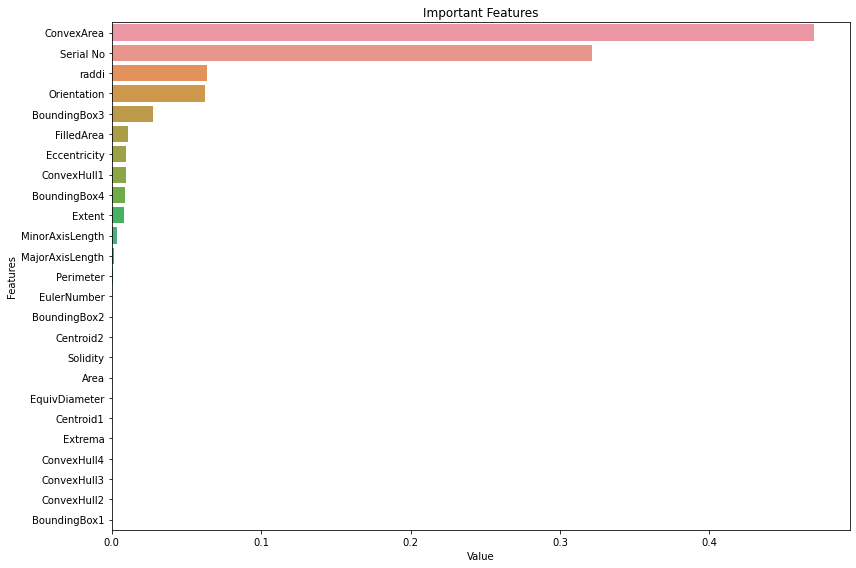

In [94]:
# Plotting feature importances in descending order
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,X.columns)), columns=['Value','Features'])

plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Important Features')
plt.tight_layout()
plt.show()

In [96]:
X_imp = X[['ConvexArea', 'Serial No', 'raddi', 'Orientation', 'BoundingBox3', 'FilledArea', 'Eccentricity', 'ConvexHull1','BoundingBox4','Extent','MinorAxisLength','MajorAxisLength']]

In [99]:
scale = StandardScaler().fit(X_imp)
X_imp_scaled = scale.transform(X_imp)

In [101]:
clf_xgb_imp = BaggingClassifier(base_estimator=XGBClassifier(),
                        n_estimators=20, random_state=42).fit(X_imp_scaled, y)

#accuracy_score(y_val, clf_xgb_imp.predict(X_val))

In [104]:
df_test

array([[ 0.86192147, -0.73872071,  0.20495584, ...,  0.62711314,
         0.32542519,  1.31973261],
       [ 0.50136382, -1.60474188,  0.20495584, ...,  0.52219294,
         0.16663485, -0.14332221],
       [ 1.35018135,  0.91909123, -0.6009356 , ..., -1.35063249,
        -0.04275899,  0.27418368],
       ...,
       [-0.90970608,  0.91909123,  0.83815626, ...,  0.01507868,
         0.35159942,  0.51683667],
       [-1.1463008 ,  0.0283266 , -0.85997213, ..., -0.61793981,
        -0.42752019, -0.27892242],
       [-0.31266703, -1.04553964, -0.62971743, ...,  1.27412099,
        -0.06369838,  0.59177363]])

In [105]:
df_test_imp = test[['ConvexArea', 'Serial No', 'raddi', 'Orientation', 'BoundingBox3', 'FilledArea', 'Eccentricity', 'ConvexHull1','BoundingBox4','Extent','MinorAxisLength','MajorAxisLength']]

In [106]:
df_test_imp = scale.transform(df_test_imp)

In [107]:
clf_xgb_imp_pred = clf_xgb_imp.predict(df_test_imp)

clf_xgb_imp_res = pd.DataFrame(clf_xgb_imp_pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
clf_xgb_imp_res.columns = ["microorganisms"]
clf_xgb_imp_res.to_csv("submission_clf_xgb_imp.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

# **OR**, 
**if you are working on Google Colab then use the below set of code to save prediction results locally**

## How to save prediction results locally via colab notebook?
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [ ]:
# To create Dataframe of predicted value with particular respective index
#target = pd.read_csv(r'/content/test_ans.csv')
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["microorganisms"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Well Done! 👍**
You are all set to make a submission. Let's head to the challenge page to make the submission.